In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()


In [ ]:
import zipfile
import io

# Specify the name of the uploaded zip file
zip_file_name = 'archive (12).zip'

# Extract the contents of the zip file
with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [ ]:
# Function to load and preprocess the dataset
def load_and_preprocess_dataset(data_folder):
    image_paths = []
    labels = []

    label_mapping = {"Closed_Eyes": 0, "Open_Eyes": 1}  # Define a mapping of folder names to labels

    for label in os.listdir(data_folder):
        label_folder = os.path.join(data_folder, label)
        if os.path.isdir(label_folder):
            label_id = label_mapping.get(label, -1)  # Get the label id from the mapping
            if label_id != -1:
                for file_name in os.listdir(label_folder):
                    file_path = os.path.join(label_folder, file_name)
                    image_paths.append(file_path)
                    labels.append(label_id)

    return image_paths, labels


In [ ]:
# Function to extract features from images
def extract_features(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to a standard size
    resized_image = cv2.resize(gray, (50, 50))

    # Flatten the image to create a 1D feature vector
    flattened_image = resized_image.flatten()

    return flattened_image

In [ ]:
# Load and preprocess the dataset
data_folder = "//content//train"
image_paths, labels = load_and_preprocess_dataset(data_folder)


In [ ]:
# Extract features from images
X = [extract_features(path) for path in image_paths]

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(labels)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train an SVM model
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.99875


In [ ]:
# Extract features from the new image
new_image_path = 's0037_08572_1_0_1_0_0_01.png'
new_image = extract_features(new_image_path)


In [ ]:
# Make predictions on the new image
predicted_label = model.predict([new_image])


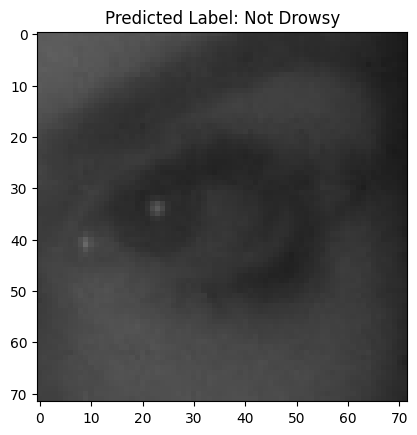

In [ ]:
# Display the new image and label the prediction
plt.imshow(cv2.imread(new_image_path))
prediction_label = "Drowsy" if predicted_label[0] == 0 else "Not Drowsy"
plt.title(f"Predicted Label: {prediction_label}")
plt.show()